In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install CoinMarketCapAPI
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import coinmarketcapapi
import matplotlib.pyplot as plt
import squarify 
cmc = coinmarketcapapi.CoinMarketCapAPI('bd89edf4-d83b-4dac-83d6-3d192f0ccbf7')
data_listing = cmc.cryptocurrency_listings_latest()
df = pd.DataFrame(data_listing.data)
df = df[['name', 'symbol', 'cmc_rank', 'last_updated', 'quote']]
df.head()

ModuleNotFoundError: ignored

In [ ]:
#split json to columns
quote = pd.json_normalize(df['quote']).iloc[:,:10]
quote.rename({'USD.price' : 'price',
              'USD.percent_change_24h' : '%_change_24h',
              'USD.percent_change_7d' : '%_change_7d',
              'USD.percent_change_30d' : '%_change_30d',
              'USD.percent_change_60d' : '%_change_60d',
              'USD.percent_change_90d' : '%_change_90d',
              'USD.market_cap' : 'market_cap',}, axis=1, inplace=True)
quote.drop(quote.columns[[1, 2, 3]], axis = 1, inplace = True)

quote.head()

,price,%_change_24h,%_change_7d,%_change_30d,%_change_60d,%_change_90d,market_cap
0,28044.304774,-1.939169,-3.689269,24.743924,20.198858,66.601661,5.423297e+11
1,1895.512012,-0.803498,3.786107,20.435242,13.784511,51.501478,2.283292e+11
2,0.999910,-0.005250,-0.035634,-0.008968,-0.025502,0.021368,8.010054e+10
3,312.746084,-0.288444,-1.564110,8.267689,-5.514061,21.298280,4.937866e+10
4,0.999472,-0.025854,-0.058391,-0.060380,-0.052383,-0.048846,3.260550e+10


In [ ]:
data = pd.concat([df, quote], axis = 1, join = 'inner')
data = data.drop(columns = ['quote'])
#Drop rows containing USD (tether) or DAI
data.drop(data[data['symbol'].str.contains('US|DAI')].index.tolist(), inplace = True)
data['last_updated'] = pd.to_datetime(data['last_updated']).dt.strftime('%Y-%m-%d %H:%M')
data.head()

,name,symbol,cmc_rank,last_updated,price,%_change_24h,%_change_7d,%_change_30d,%_change_60d,%_change_90d,market_cap
0,Bitcoin,BTC,1,2023-04-06 02:43,28044.304774,-1.939169,-3.689269,24.743924,20.198858,66.601661,5.423297e+11
1,Ethereum,ETH,2,2023-04-06 02:43,1895.512012,-0.803498,3.786107,20.435242,13.784511,51.501478,2.283292e+11
3,BNB,BNB,4,2023-04-06 02:43,312.746084,-0.288444,-1.564110,8.267689,-5.514061,21.298280,4.937866e+10
5,XRP,XRP,6,2023-04-06 02:43,0.502112,-0.518805,-8.079842,36.007421,22.565309,48.646239,2.593376e+10
6,Cardano,ADA,7,2023-04-06 02:43,0.389029,-1.954569,0.798158,16.659157,-2.302732,43.024632,1.352050e+10


In [ ]:
def colors_map(change_period = '%_change_24h'):
    conditions = [data[change_period] > 10,
                  (data[change_period] <= 10) & (data[change_period]> 5),
                  (data[change_period] <= 5) & (data[change_period]> 0.5),
                  (data[change_period] <= 0.5) & (data[change_period]> -0.5),
                  (data[change_period] <= -0.5) & (data[change_period]> -5),
                  (data[change_period] <= -5) & (data[change_period]> -10),
                  data[change_period] <= -10]
    colors_codes = ['green', 'blue', 'yellow',  'red', 'pink', 'grey', 'violet']

    colors = np.select(conditions, colors_codes, default=np.nan)
    return colors

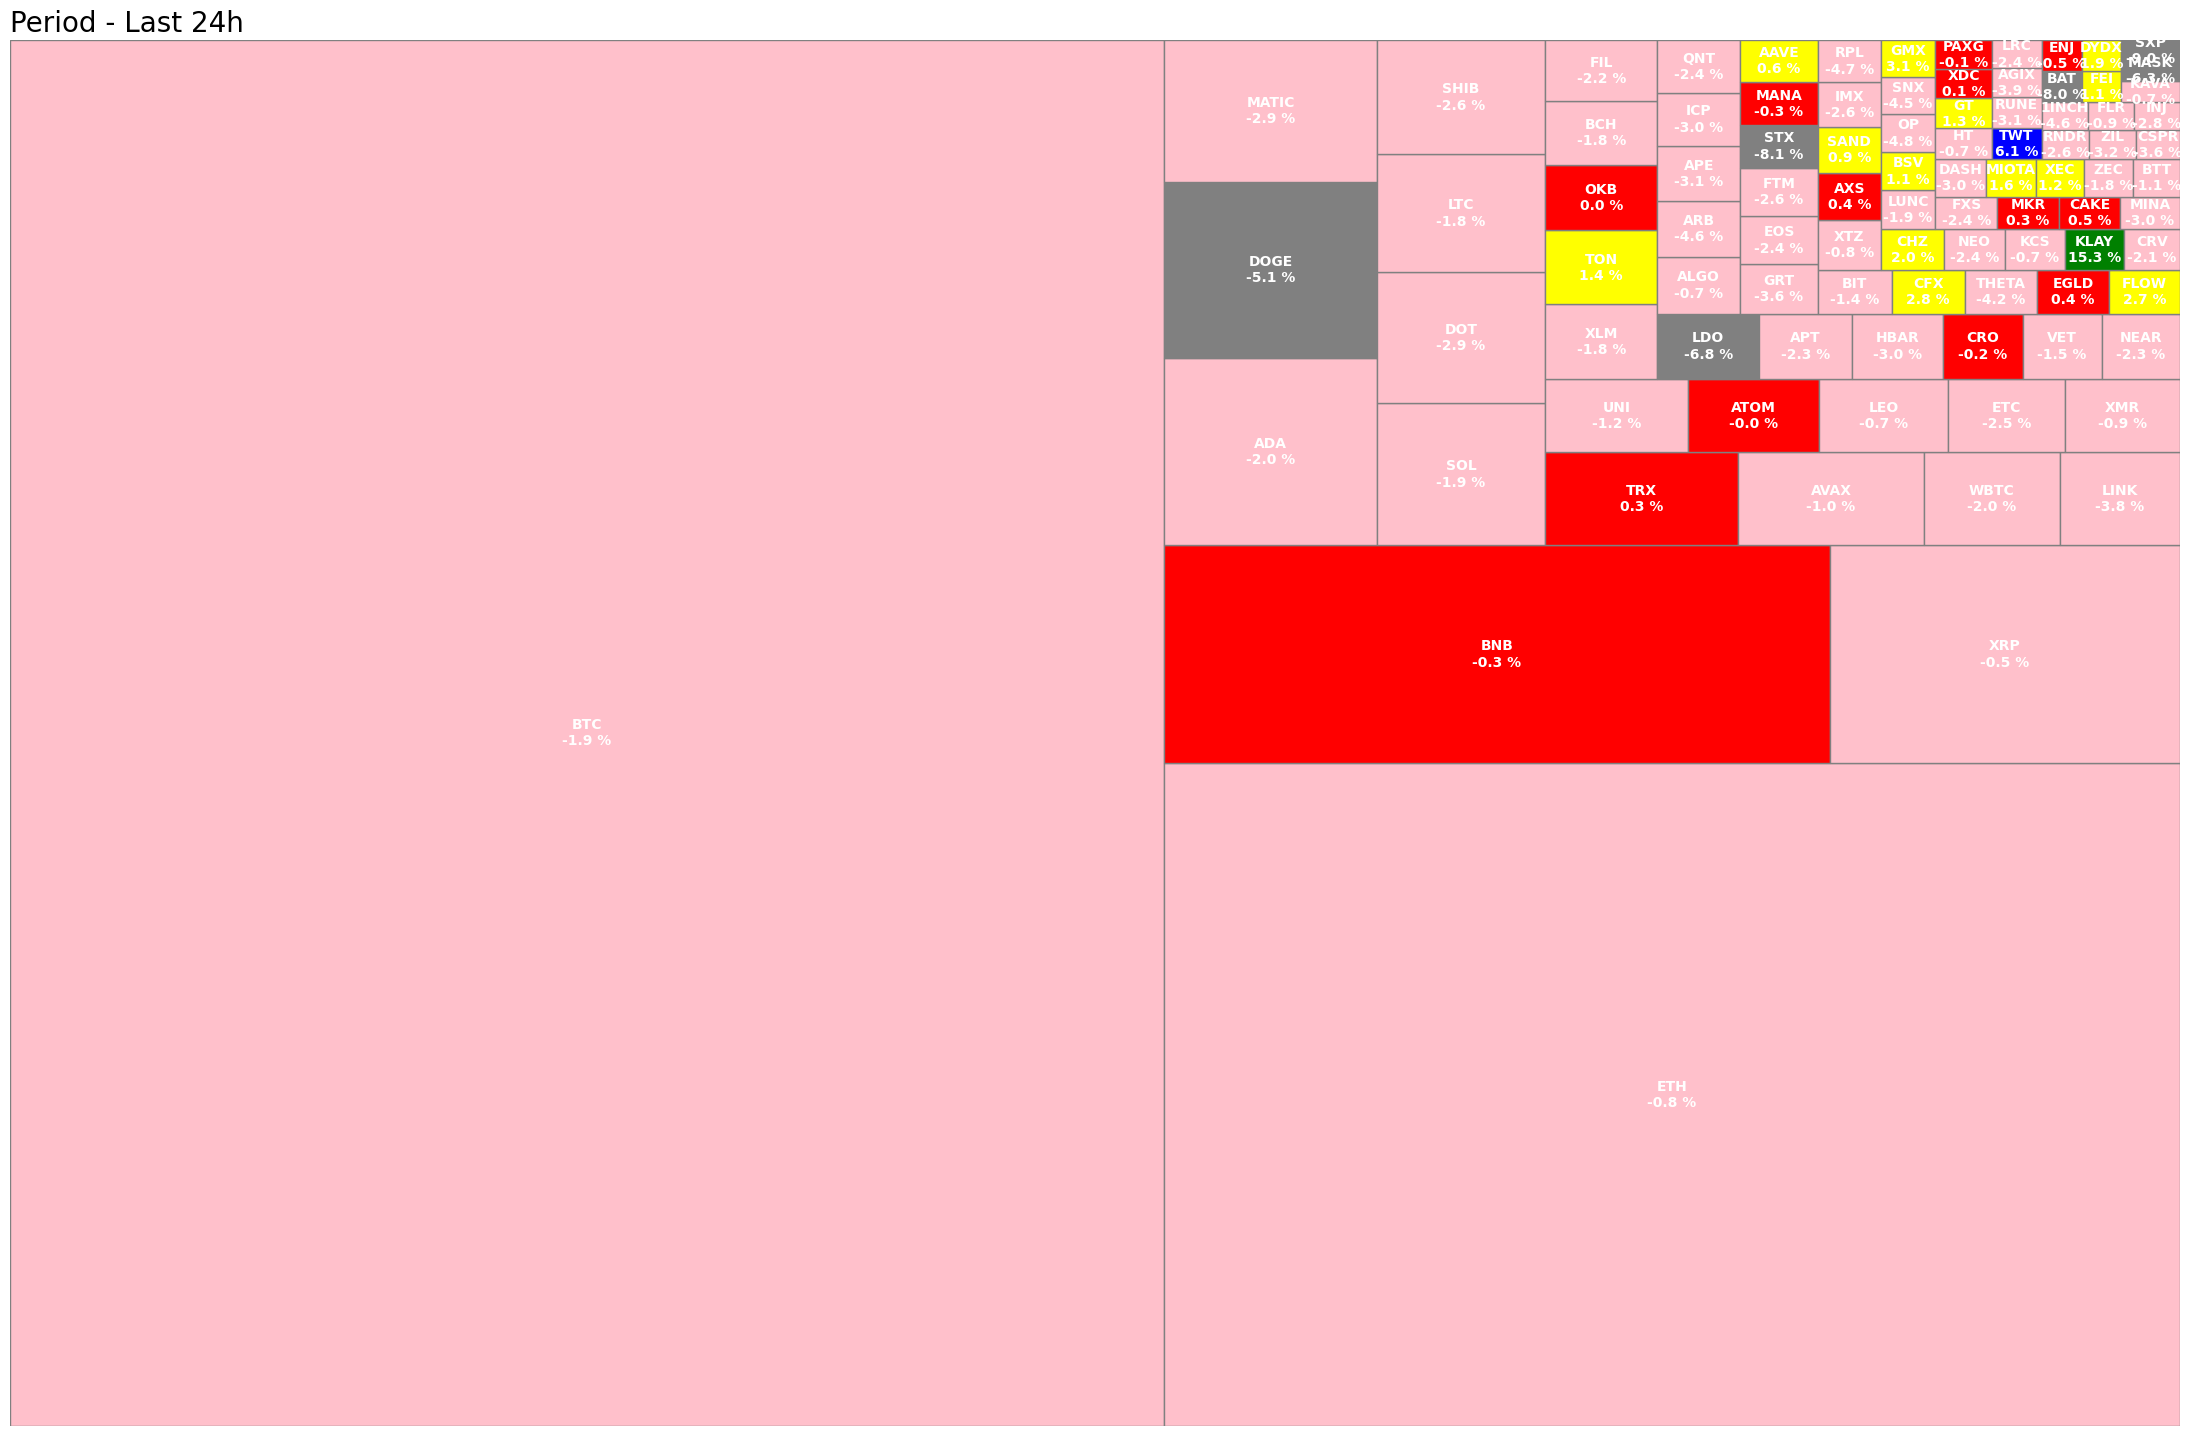

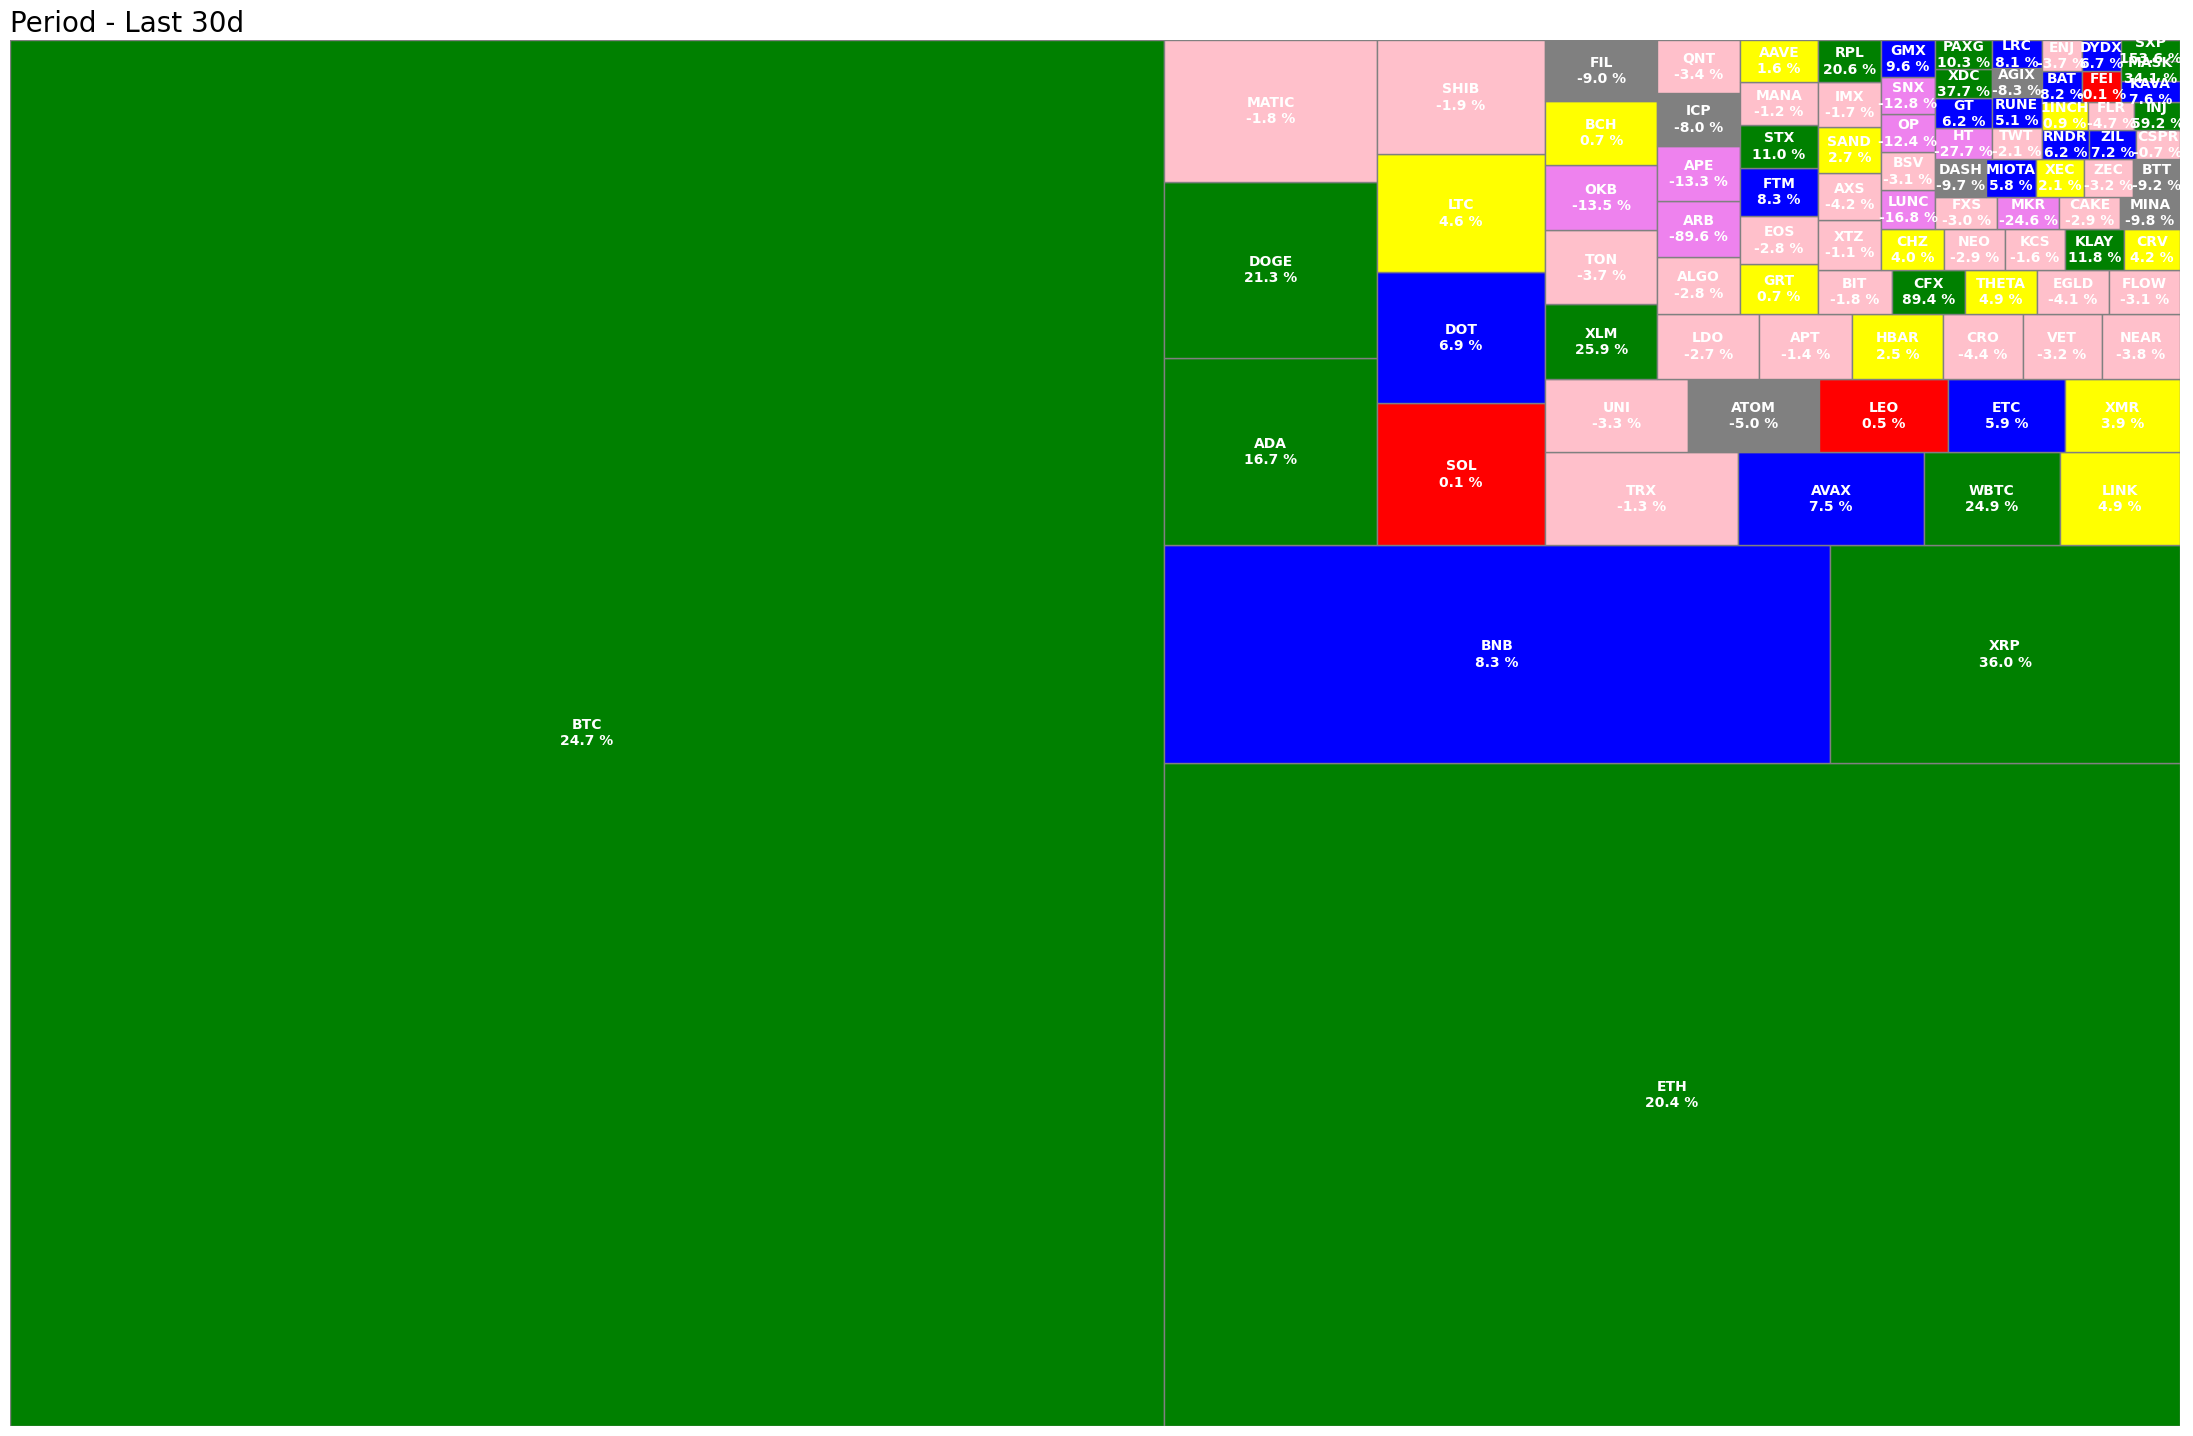

In [ ]:

def treemap_plot(change_period = '%_change_24h'):
    plt.figure(figsize = (28, 18))

    #split labels to 2 lines and add % symbol after change value
    labels = [f'{symbol}\n{change:.1f} %' for symbol, change in zip(data['symbol'], data[change_period])]
    squarify.plot(sizes = data['market_cap'], 
                  label = labels, 
                  color = colors_map(change_period = change_period), 
                  edgecolor = 'gray', 
                  text_kwargs = {'color': 'white', 'weight': 'bold', 'fontsize': 10})
    plt.axis('off') #remove axis values
    plt.title('Period - Last ' + str(change_period).split('_')[-1], loc = 'left', size = 20)
    plt.show()
treemap_plot('%_change_24h')
treemap_plot('%_change_30d')

### Plot from 1 January 2022 up to 06 April 2023

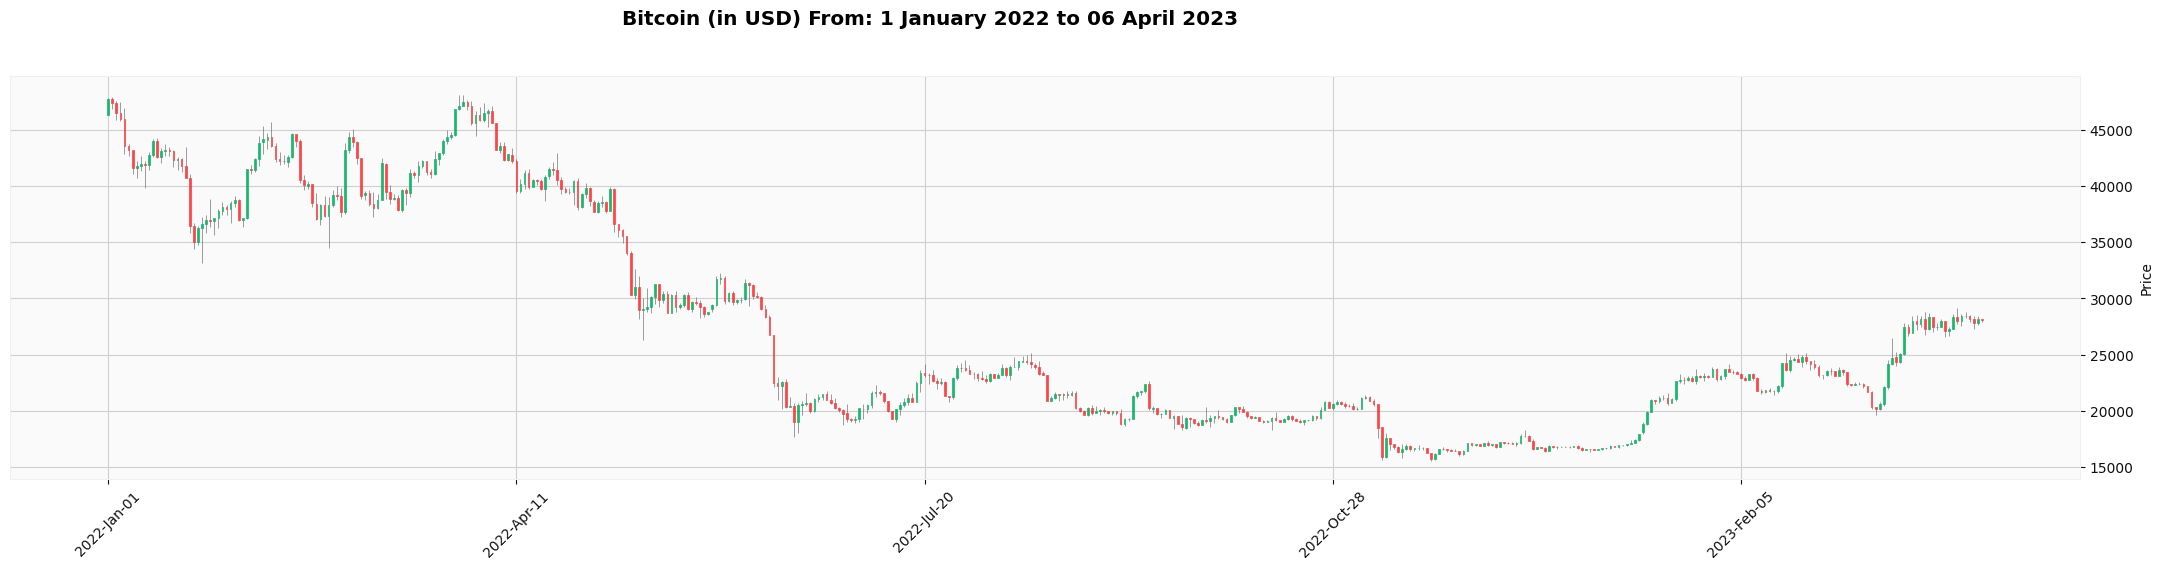

In [ ]:
import datetime
from datetime import date
from IPython.display import Markdown
# !pip -q install mplfinance
import mplfinance as mpf
# !pip -q install yfinance
import yfinance as yf
now = datetime.datetime.now()
# obtain the Bitcoin ticker in USD
bitCoinUSD = yf.Ticker("BTC-USD")
# save the historical market data to a pandas dataframe
bitCoinUSD_values = bitCoinUSD.history(start="2022-01-01")
display(Markdown('### Plot from 1 January 2022 up to ' + now.strftime('%d %B %Y')))
display(Markdown(""))
mpf.plot(bitCoinUSD_values,type='candle',volume=False,figratio=(5,1),style='yahoo', title='Bitcoin (in USD) From: 1 January 2022 to ' + now.strftime('%d %B %Y'));

In [ ]:
file_path = '/content/sample_data/bitcoin.csv'
dataset = pd.read_csv(file_path)
dataset.head()

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03 00:00:00.000,286.572,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04 00:00:00.000,260.936,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05 00:00:00.000,273.220,1.550381e+08,3.740880e+09,bitcoin


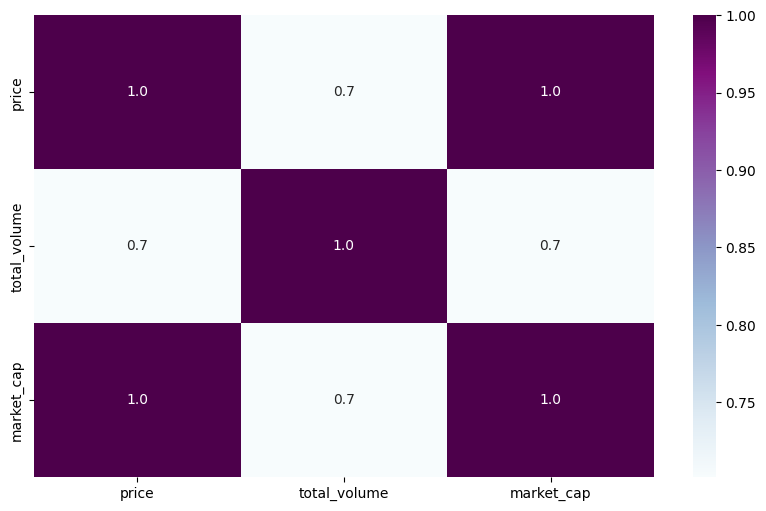

In [ ]:
import seaborn as sns
# plotting correlation heatmap
plt.figure(figsize = (10, 6))
dataplot = sns.heatmap(dataset[['price', 'total_volume', 'market_cap']].corr(), cmap="BuPu", annot=True, 
                      fmt=".1f")
plt.show()

Price and Market_Cap are almost correlate features. 

In [ ]:
data = dataset['price'].values
print('Length of Total data: ', len(data))
train_length = int(len(data) * 0.8)
train_data = data[:train_length]
test_data = data[train_length:]
print('Train and Test data length: ', len(train_data), len(test_data))

Length of Total data:  3016
Train and Test data length:  2412 604


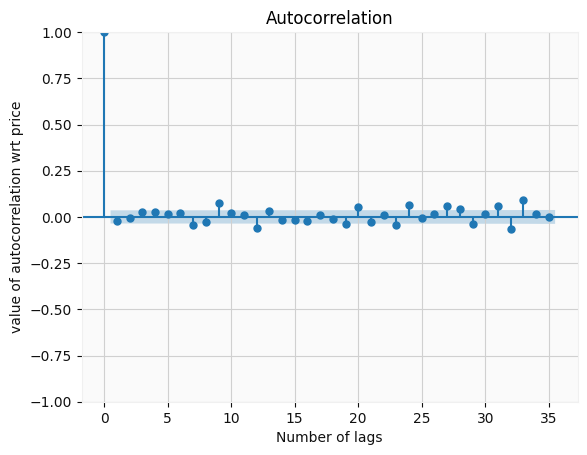

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(dataset['price'].diff().dropna())
plt.xlabel('Number of lags')
plt.ylabel('value of autocorrelation wrt price')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,0,8))
model_fit = model.fit(low_memory = False)
print(model_fit.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2412
Model:                 ARIMA(1, 0, 8)   Log Likelihood              -19095.972
Date:                Thu, 06 Apr 2023   AIC                          38213.944
Time:                        03:53:46   BIC                          38277.614
Sample:                             0   HQIC                         38237.101
                               - 2412                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8714.4150     43.501    200.325      0.000    8629.154    8799.676
ar.L1          0.9994      0.000   2382.307      0.000       0.999       1.000
ma.L1         -0.0449      0.009     -4.987      0.0

In [ ]:
# Forecast
forecast_result = model_fit.forecast(150, alpha=0.05)  # 95% conf
forecast_result[:30]

array([44314.9778034 , 44447.09940889, 44324.42555817, 44130.25194301,
       43902.60728621, 43565.77711562, 43441.74537702, 43522.86069923,
       43500.94311695, 43479.03933536, 43457.14934576, 43435.27313947,
       43413.41070782, 43391.56204212, 43369.72713372, 43347.90597394,
       43326.09855414, 43304.30486566, 43282.52489985, 43260.75864807,
       43239.0061017 , 43217.26725209, 43195.54209062, 43173.83060869,
       43152.13279766, 43130.44864894, 43108.77815391, 43087.121304  ,
       43065.47809059, 43043.84850511])

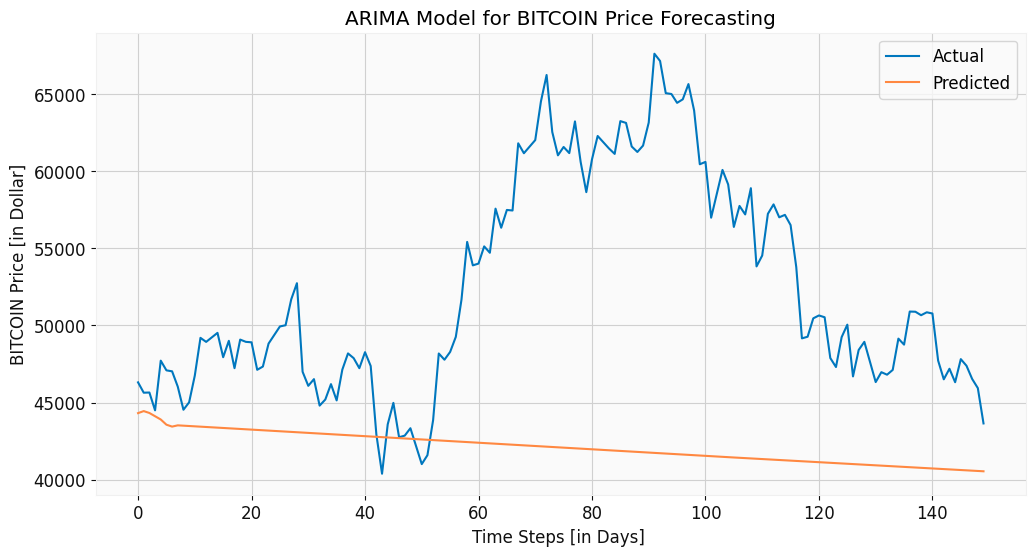

In [ ]:
# Here we're plotting Test and Predicted data

plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 12})
plt.plot(test_data[:150], '#0077be',label = 'Actual')
plt.plot(forecast_result[:], '#ff8841',label = 'Predicted')
plt.title('ARIMA Model for BITCOIN Price Forecasting')
plt.ylabel('BITCOIN Price [in Dollar]')
plt.xlabel('Time Steps [in Days] ')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

def evaluate_forecast_results(actual, predicted):
    print('R2 Score: ', round(r2_score(actual, predicted), 2))
    print('MAE : ', round(mae(actual, predicted), 2))
    print('MSE: ', round(mean_squared_error(actual,predicted), 2))
    print('RMSE: ', round(math.sqrt(mean_squared_error(actual,predicted)), 2))
evaluate_forecast_results(test_data[:150],forecast_result[:])

R2 Score:  -2.3
MAE :  10328.84
MSE:  157580103.51
RMSE:  12553.09


In [ ]:
#ANN
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Train length:  2412
Shape of Train and Test data:  (2412,) (604,)


In [ ]:
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Shape of Train and Test data:  (2412, 1) (604, 1)


In [ ]:
# split a univariate sequence into supervised learning [Input and Output]
def create_dataset(dataset, lookback):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookback -1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        b = dataset[i+lookback, 0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import keras

In [ ]:
lag=2
model = Sequential()
model.add(Dense(64, input_dim = lag, activation='relu', name= "1st_hidden"))
# model.add(Dense(64, activation='relu', name = '2nd_hidden'))
model.add(Dense(1, name = 'Output_layer', activation='linear'))
# model.add(Activation("linear", name = 'Linear_activation'))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_hidden (Dense)          (None, 64)                192       
                                                                 
 Output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_X, train_y = create_dataset(train_data, lag)
test_X, test_y = create_dataset(test_data, lag)

In [ ]:
epoch_number = 100
batches = 64

history = model.fit(train_X, train_y, epochs = epoch_number, batch_size = batches, verbose = 1, shuffle=False, 
                    validation_split=0.1)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 9373834.0000 - val_loss: 203934912.0000
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 983611.6875 - val_loss: 14012089.0000
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 124186.8203 - val_loss: 4535623.0000
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 122919.7109 - val_loss: 4377420.0000
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 120503.1328 - val_loss: 4351321.0000
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 119876.0312 - val_loss: 4330366.5000
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 119325.4297 - val_loss: 4311908.0000
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 118797.3125 - val_loss: 4293882.0000
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 118258.9766 - val_loss: 4276182.5000
Epoch 

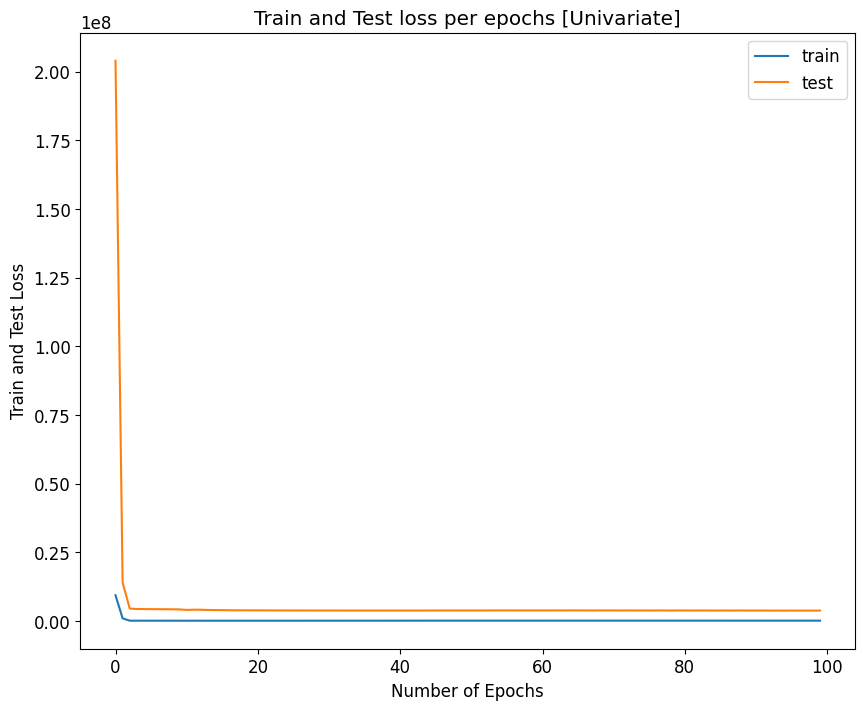

In [ ]:
plt.clf
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Number of Epochs')
plt.ylabel('Train and Test Loss')
plt.title('Train and Test loss per epochs [Univariate]')
plt.legend()
plt.show()

In [ ]:
testPredict = model.predict(test_X)
predicted_value = testPredict[:, 0]
predicted_value

19/19 [==============================] - 0s 1ms/step


array([45539.24  , 45435.984 , 44437.97  , 46785.113 , 46980.2   ,
       46819.184 , 45956.113 , 44504.543 , 44699.758 , 46147.176 ,
       48428.254 , 48760.707 , 48951.1   , 49228.605 , 47905.676 ,
       48540.83  , 47212.332 , 48447.008 , 48739.848 , 48685.105 ,
       47108.63  , 47068.12  , 48268.605 , 48995.277 , 49570.676 ,
       49762.176 , 51085.42  , 52264.543 , 47299.598 , 46002.496 ,
       46206.555 , 44789.465 , 44899.062 , 45760.36  , 45072.22  ,
       46477.355 , 47730.88  , 47719.707 , 47121.34  , 47813.484 ,
       47282.98  , 43145.72  , 40455.39  , 42677.52  , 44465.01  ,
       42787.3   , 42633.73  , 43029.207 , 42192.285 , 40971.395 ,
       41266.824 , 43155.94  , 46998.793 , 47636.688 , 47946.7   ,
       48815.777 , 50899.06  , 54331.527 , 53834.87  , 53733.145 ,
       54623.496 , 54541.082 , 56675.83  , 56244.223 , 56966.55  ,
       57191.707 , 60560.184 , 61005.074 , 61204.527 , 61633.168 ,
       63667.777 , 65550.79  , 62627.645 , 60944.7   , 61165.5

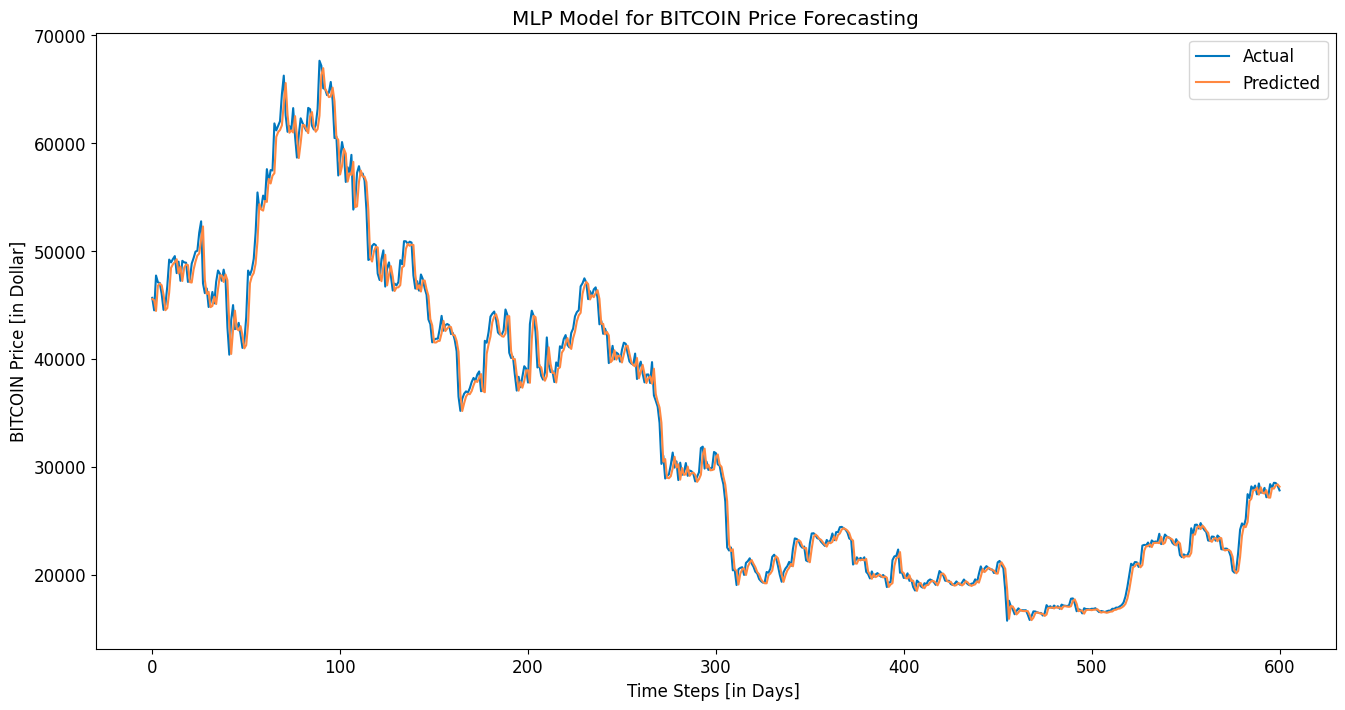

In [ ]:
plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 12})
plt.plot(test_y[:], '#0077be',label = 'Actual')
plt.plot(predicted_value, '#ff8841',label = 'Predicted')
plt.title('MLP Model for BITCOIN Price Forecasting')
plt.ylabel('BITCOIN Price [in Dollar]')
plt.xlabel('Time Steps [in Days] ')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

def evaluate_forecast_results(actual, predicted):
    print('R2 Score: ', round(r2_score(actual, predicted), 2))
    print('MAE : ', round(mae(actual, predicted), 2))
    print('MSE: ', round(mean_squared_error(actual,predicted), 2))
    print('RMSE: ', round(math.sqrt(mean_squared_error(actual,predicted)), 2))
evaluate_forecast_results(test_y, predicted_value)

R2 Score:  0.99
MAE :  816.92
MSE:  1538210.68
RMSE:  1240.25
